______________

# HANDLING CLASS IMBALANCE PROBLEM

_________

In [1]:
import numpy as np 
import pandas as pd

In [2]:
# import data dari csv
df = pd.read_csv('npl_train.csv')

In [3]:
# manmpilkan beberapa baris data awal
df.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [4]:
print("Dimensi data :\n",df.shape,"\n")
print("Tipe Data :\n",df.dtypes,"\n")
print("Data Hilang :\n",df.isnull().sum(),"\n")

Dimensi data :
 (15493, 24) 

Tipe Data :
 X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_pe

_________

# EDA 

_____________

# Peubah Respon

In [5]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

# library seaborn
import seaborn as sns

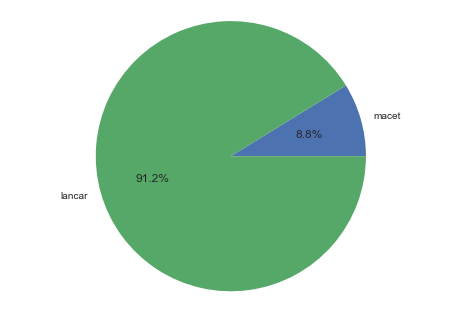

In [6]:
# menghitung ukuran diagram pie
size = [sum(df['flag_kredit_macet']),len(df['flag_kredit_macet'])-sum(df['flag_kredit_macet'])]

# menentukan label
label = ['macet','lancar']

# diagram pie
plt.pie(size,labels=label, autopct = '%1.1f%%')

# merubah ukuran huruf pada grafik
sns.set_context("paper", font_scale=2)

plt.axis('equal')
plt.show()

# Peubah Penjelas Numerik

In [7]:
# fitur numerik (float64)
FITUR_FLOAT=list(df.columns[df.dtypes=='float64'])

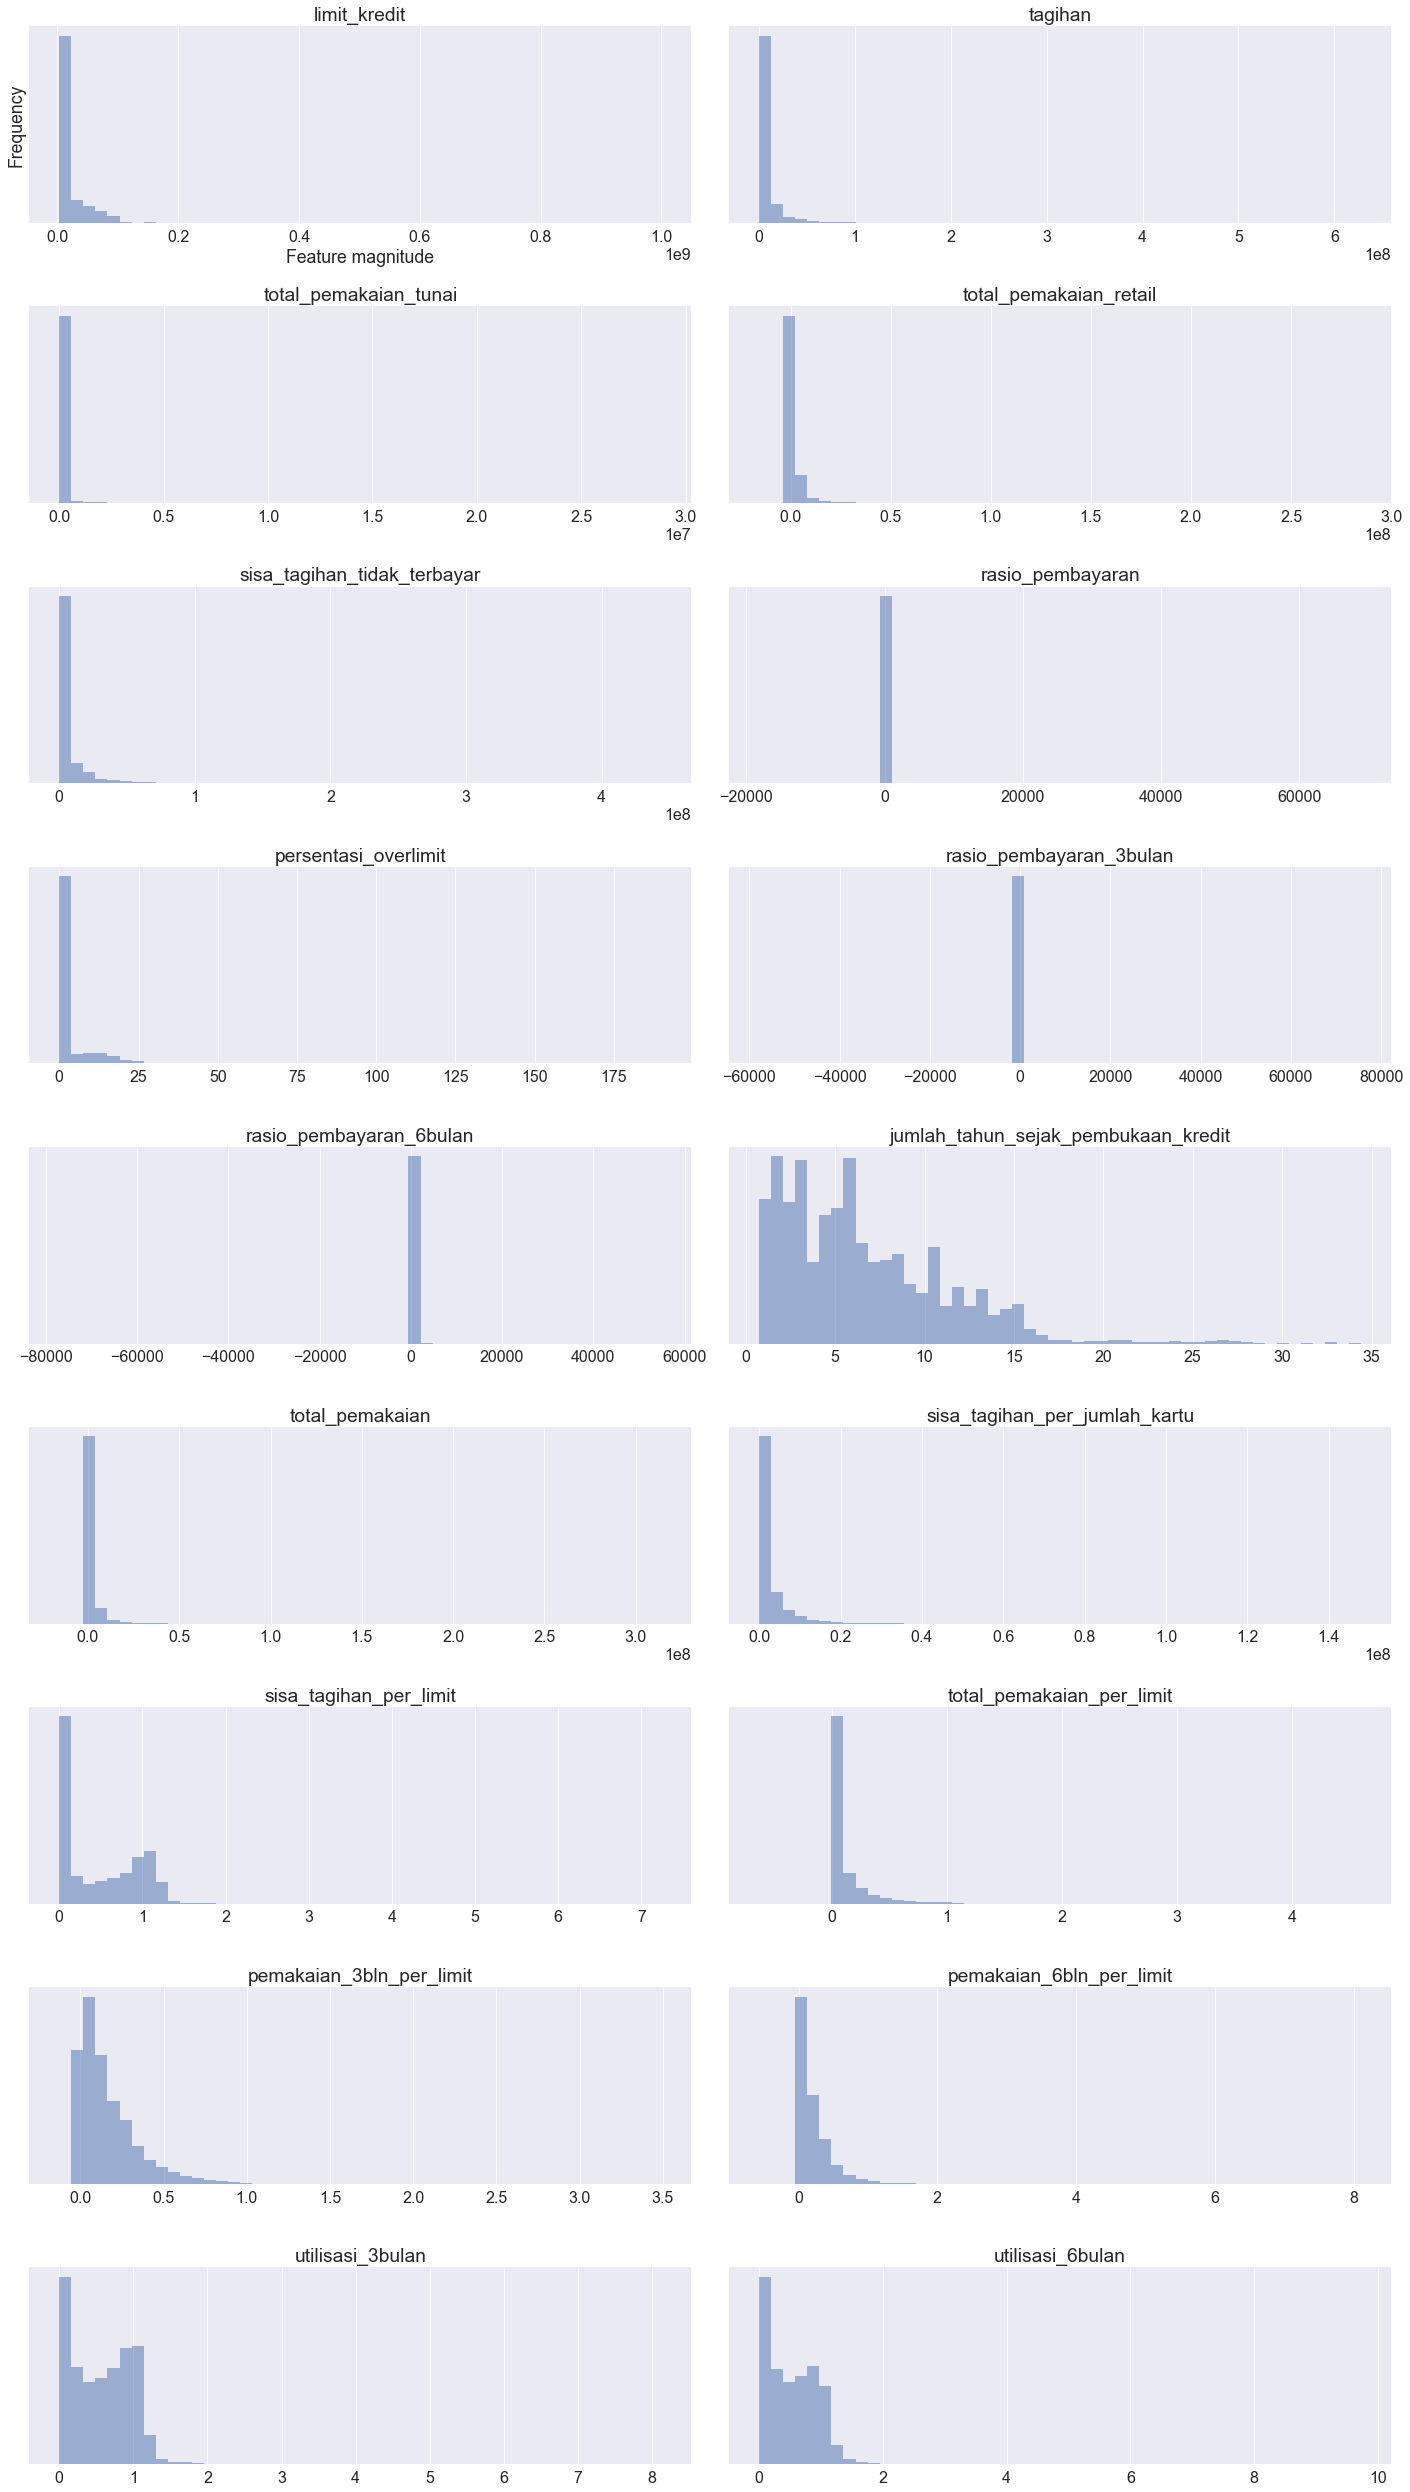

In [8]:
# menyediakan jenedla dengan ukuran tertentu
fig, axes = plt.subplots(9,2, figsize = (20,35))

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i,fitur in zip(range(0,18),FITUR_FLOAT):
    
    # banyaknya kelas pada histogram  
    _, bins = np.histogram(df[fitur],bins=50)
    
    # histogram untuk setiap peubah numerik
    ax[i].hist(df[fitur], bins=bins,  alpha=.5) 
    
    # menambahkan judul
    ax[i].set_title(fitur)    
    
    # menghilangkan skala pada sumbu y
    ax[i].set_yticks(()) 
    
# menambahkan label pada sumbu x
ax[0].set_xlabel("Feature magnitude") 

# menambahkan label pada sumbu y
ax[0].set_ylabel("Frequency") 

# mengatur jarak pada jendela secara otomatis
fig.tight_layout()
plt.show()

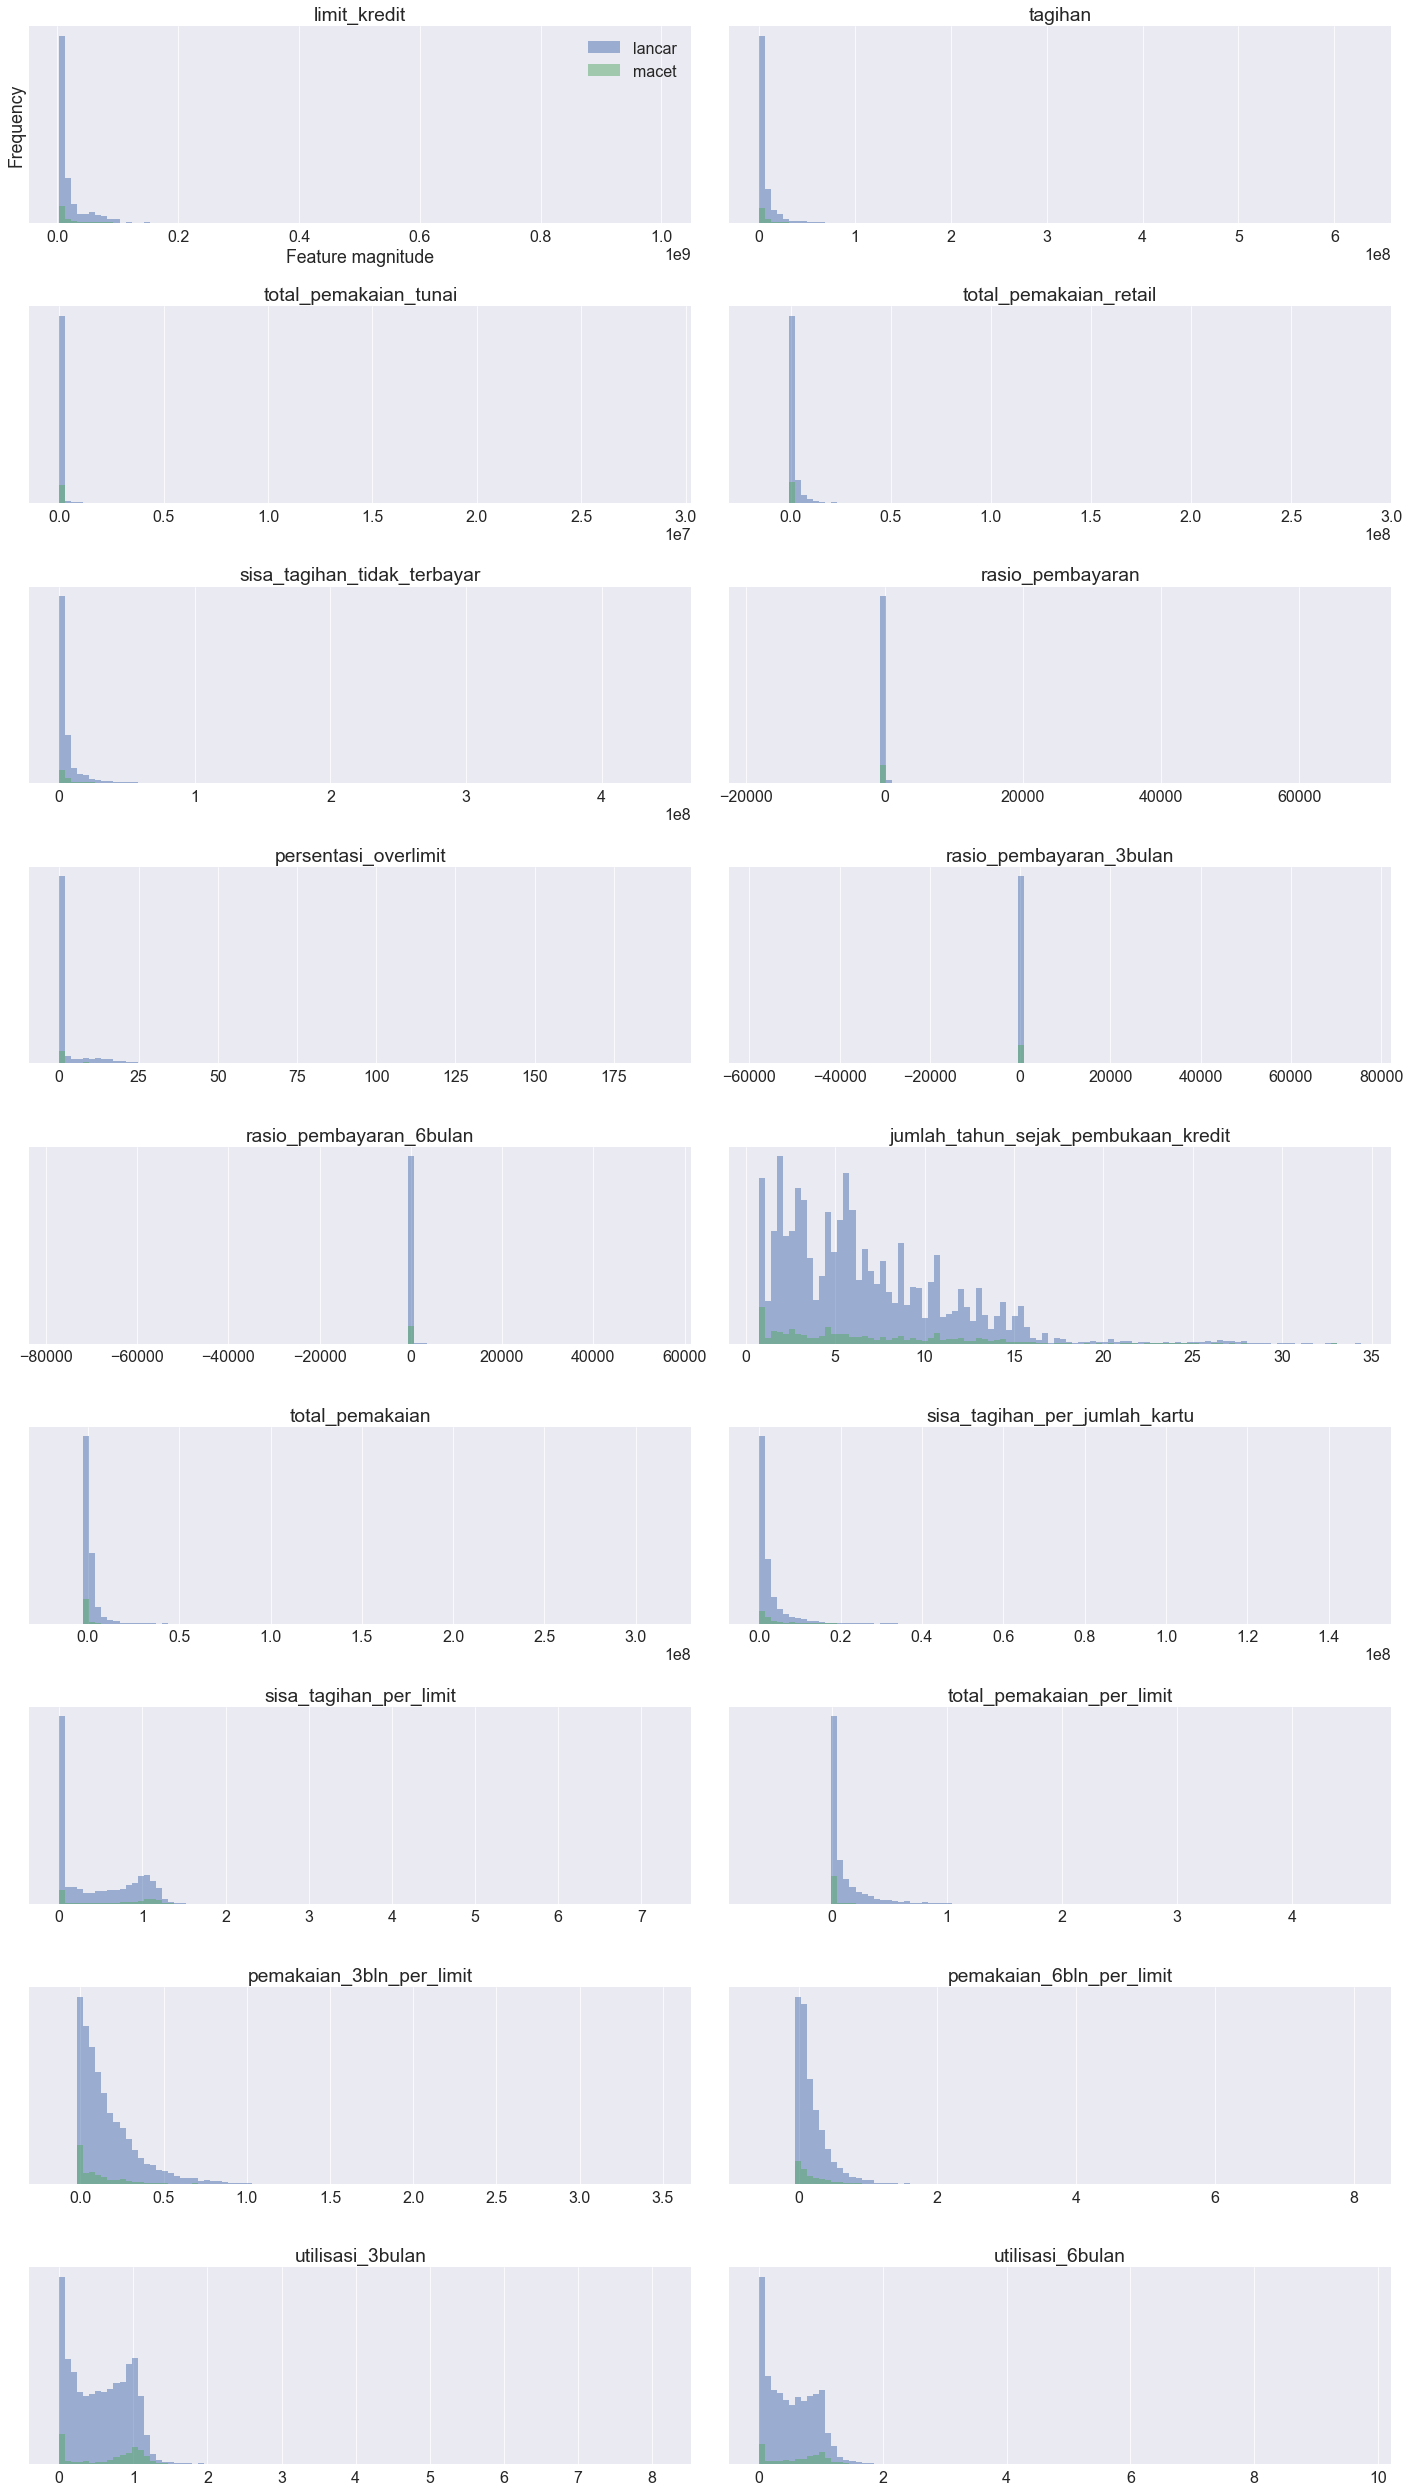

In [9]:
# membuat stacked histogram dengan looping

# menyediakan jenedla dengan ukuran tertentu
fig, axes = plt.subplots(9,2, figsize = (20,35))

# memisahkan data untuk masing masing kategori pada peubah respon
macet = df[df['flag_kredit_macet']==1]
lancar = df[df['flag_kredit_macet']==0]

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i,fitur in zip(range(0,18),FITUR_FLOAT):
    
    # banyaknya kelas pada histogram
    _, bins = np.histogram(df[fitur],bins=100)
    
    # membuat histogram kategori lancar
    ax[i].hist(lancar[fitur], bins=bins,  alpha=.5)   
    
    # membuat histogram kategori macet
    ax[i].hist(macet[fitur], bins=bins, alpha=.5)   
    
    # menambahkan judul
    ax[i].set_title(fitur)    
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_yticks(()) 
    
ax[0].set_xlabel("Feature magnitude") 
ax[0].set_ylabel("Frequency") 
ax[0].legend(["lancar", "macet"], loc="best") 
fig.tight_layout()
plt.show()

In [10]:
# fitur numerik integer
FITUR_INT = list(df.columns[df.dtypes=='int64'])
FITUR_INT=FITUR_INT[1:4]
FITUR_INT

['jumlah_kartu', 'outstanding', 'skor_delikuensi']

In [11]:
for i in ['jumlah_kartu','skor_delikuensi']: 
    print(df[i].value_counts().sort_index(),"\n")

1        76
2     10734
3      2795
4      1136
5       460
6       151
7        75
8        27
9        16
10        7
11        7
12        2
13        4
15        1
16        2
Name: jumlah_kartu, dtype: int64 

0    15451
1       29
2        4
3        2
4        4
5        3
Name: skor_delikuensi, dtype: int64 



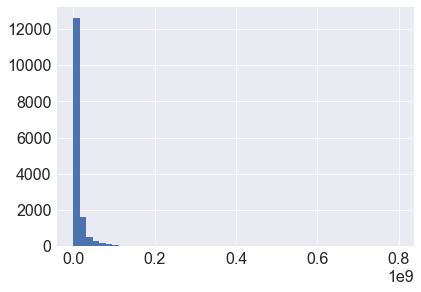

In [12]:
plt.hist(df['outstanding'],bins=50)

plt.show()

# Peubah Kategorik

# Input Missing

In [13]:
# isi missing value dengan modus
df['kode_cabang'].fillna('A',inplace=True)

In [14]:
df['kode_cabang'].value_counts().sort_index()

A    8805
B    1351
C     334
D     205
E     592
F    1697
G     566
H     367
I     991
J     410
K     175
Name: kode_cabang, dtype: int64

In [15]:
# merubah ukuran huruf pada grafik
sns.set_context("paper", font_scale=2)

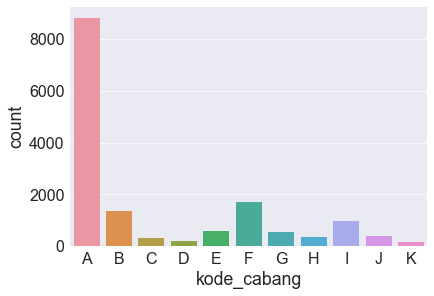

In [16]:
# countplot
sns.countplot(x='kode_cabang',data=df.sort_values(by='kode_cabang'))
plt.show()

In [17]:
# tabluasi silang
cabang = pd.crosstab(df['kode_cabang'],df['flag_kredit_macet'])
cabang

flag_kredit_macet,0,1
kode_cabang,,
A,8033,772
B,1219,132
C,307,27
D,193,12
E,535,57
F,1553,144
G,536,30
H,334,33
I,889,102


In [18]:
# tabluasi silang normalisasi
cabang_std = pd.crosstab(df['kode_cabang'],df['flag_kredit_macet'],normalize=0)
cabang_std

flag_kredit_macet,0,1
kode_cabang,,
A,0.912323,0.087677
B,0.902295,0.097705
C,0.919162,0.080838
D,0.941463,0.058537
E,0.903716,0.096284
F,0.915144,0.084856
G,0.946996,0.053004
H,0.910082,0.089918
I,0.897074,0.102926


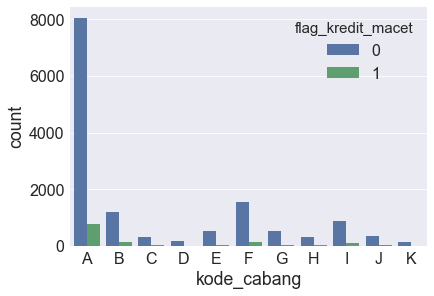

In [19]:
# countplot dengan pembeda 'flag_kredit_macet'
sns.countplot(x='kode_cabang',hue='flag_kredit_macet',data=df.sort_values(by='kode_cabang'))

plt.show()

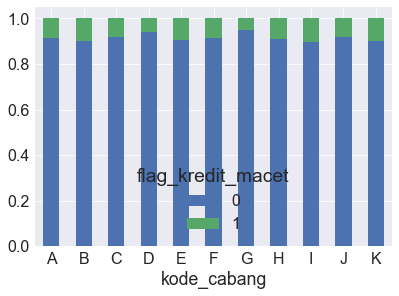

In [20]:
# stacked barplot
cabang_std.plot(kind='bar',stacked=True)

# merubah orientasi label
plt.xticks(rotation='horizontal')

plt.show()

_______

# PEMODELAN

______

# Membuat Peubah Boneka

In [21]:
# peubah penjelas
FITUR = FITUR_FLOAT + FITUR_INT + ['kode_cabang'] 
FITUR

['limit_kredit',
 'tagihan',
 'total_pemakaian_tunai',
 'total_pemakaian_retail',
 'sisa_tagihan_tidak_terbayar',
 'rasio_pembayaran',
 'persentasi_overlimit',
 'rasio_pembayaran_3bulan',
 'rasio_pembayaran_6bulan',
 'jumlah_tahun_sejak_pembukaan_kredit',
 'total_pemakaian',
 'sisa_tagihan_per_jumlah_kartu',
 'sisa_tagihan_per_limit',
 'total_pemakaian_per_limit',
 'pemakaian_3bln_per_limit',
 'pemakaian_6bln_per_limit',
 'utilisasi_3bulan',
 'utilisasi_6bulan',
 'jumlah_kartu',
 'outstanding',
 'skor_delikuensi',
 'kode_cabang']

In [22]:
print("peubah awal:\n", list(df[FITUR]),"\n")
# pembuatan peubah boneka secara otomatis untuk semua peubah kategorik
df_dummies = pd.get_dummies(df[FITUR],drop_first=True)
print("peubah setelah dummy dibuat:\n", list(df_dummies),"\n")

peubah awal:
 ['limit_kredit', 'tagihan', 'total_pemakaian_tunai', 'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan', 'jumlah_kartu', 'outstanding', 'skor_delikuensi', 'kode_cabang'] 

peubah setelah dummy dibuat:
 ['limit_kredit', 'tagihan', 'total_pemakaian_tunai', 'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisas

# Membagi Data Train Test

In [23]:
# library untuk membagi data
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_dummies,
                                                          df['flag_kredit_macet'],
                                                          random_state=12,
                                                          stratify=df['flag_kredit_macet'])

# Oversampling, Undersampling, SMOTE

In [25]:
# library untuk menyeimbangkan data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# library untuk menghitung frekuensi
from collections import Counter 

In [26]:
# oversampling
ros = RandomOverSampler(random_state=10)
x_ros,y_ros = ros.fit_sample(x_train,y_train)
print("Frekuensi masing-masing kelas",sorted(Counter(y_ros).items()))

Frekuensi masing-masing kelas [(0, 10600), (1, 10600)]


In [27]:
# undesampling
rus = RandomUnderSampler(random_state=10)
x_rus,y_rus = rus.fit_sample(x_train,y_train)
print("Frekuensi masing-masing kelas",sorted(Counter(y_rus).items()))

Frekuensi masing-masing kelas [(0, 1019), (1, 1019)]


In [28]:
# smote
smote = SMOTE(random_state=10)
x_smote,y_smote = smote.fit_sample(x_train,y_train)
print("Frekuensi masing-masing kelas",sorted(Counter(y_smote).items()))   

Frekuensi masing-masing kelas [(0, 10600), (1, 10600)]


# Evaluasi Prediksi

In [29]:
# library untuk evaluasi hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score

# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [30]:
# membuat rataan geometrik sensitivitas, spesifisitas, dan akurasi
# salah satu ukuran evaluasi prediksi untuk data tidak seimbang
def geometri_score(y_true,y_pred):
    from sklearn.metrics import confusion_matrix
    spe = confusion_matrix(y_true,y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0]+confusion_matrix(y_true,y_pred)[0,1])
    sen = recall_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    eval_baru = (spe*sen*acc)**(1/3)
    return eval_baru

geometri = make_scorer(geometri_score)

# Adaptive Boosting

# Regresi Logistik

In [1]:
# library regresi logistik
from sklearn.linear_model import LogisticRegression

In [2]:
def eval(alg,X,y):
    print("akurasi cv : \n",
          cross_val_score(alg,X,y,scoring="accuracy"),"\n")
    print("geometri cv : \n",
          cross_val_score(alg,X,y,scoring="geometry"),"\n")
    print("recall cv : \n",
          cross_val_score(alg,X,y,scoring="recall"),"\n")
    print("presisi cv : \n",
          cross_val_score(alg,X,y,scoring="precision"),"\n")
    print("f1 cv : \n",
          cross_val_score(alg,X,y,scoring="f1"),"\n")
    print("confusion matirx test:\n",
          confusion_matrix(y,alg.predict(x)),"\n")
    print("classification Report test:\n",
          classification_report(y_test,alg.predict(x_test)),"\n")

In [3]:
reglog = LogisticRegression()
reglog.fit(x_train,y_train)

NameError: name 'x_train' is not defined